In [1]:
!pip install scikit-learn
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

In [3]:
# Sample data (linear functions)
x = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(x, np.array([1, 2])) / 3

print(y)
model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict a new value
pre = model.predict(x)
print("Predicted value:", pre)
print("score of model:",model.score(x,y))
rms = 0
n=len(y)
for i in range(n):
    rms+=(y[i] - pre[i])**2
rms = round((rms/n)**1/2,4)
print("rms:-",rms)


[1.         1.66666667 2.         2.66666667]
Coefficients: [0.33333333 0.66666667]
Intercept: 4.440892098500626e-16
Predicted value: [1.         1.66666667 2.         2.66666667]
score of model: 1.0
rms:- 0.0


In [4]:
# Sample for testing non leanear functions data
x = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [4, 3], [2, 5], [2, 3], [6, 3], [7, 8], [3, 9], [5, 6], [3, 1]])
y = np.dot(x**2, np.array([1, 2])) / 3

print("observed:- ", y)
model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict a new value
pre = model.predict(x)
print("Predicted value:", pre)
print("score of model:",model.score(x,y))
rms = 0
n=len(y)
for i in range(n):
    rms+=(y[i] - pre[i])**2
rms = round((rms/(n*np.mean(y)))**0.5,4)
print("rms:",rms)

observed:-  [ 1.          3.          4.          7.33333333 11.33333333 18.
  7.33333333 18.         59.         57.         32.33333333  3.66666667]
Coefficients: [2.10862295 6.69797877]
Intercept: -13.85289128011248
Predicted value: [-5.04628956  1.65168921  3.76031215 10.45829092 14.67553681 23.85424846
 10.45829092 18.89278271 54.4912995  52.75478649 36.87809607 -0.82904367]
score of model: 0.9600556890857592
rms: 0.909


In [5]:
def calculate_rms(y,cal_y):
    n=len(y)
    rms = 0
    for i in range(n):
        rms+=(y[i] - cal_y[i])**2
    rms = round((rms/n)**0.5,8)/np.mean(y)
    return rms

[np.float64(0.20202020202020202), np.float64(0.6060606060606061), np.float64(0.8080808080808081), np.float64(1.0101010101010102), np.float64(1.2121212121212122), np.float64(2.0202020202020203), np.float64(2.2222222222222223), np.float64(2.6262626262626263), np.float64(2.8282828282828283), np.float64(3.0303030303030303), np.float64(3.2323232323232323), np.float64(3.4343434343434343), np.float64(3.8383838383838382), np.float64(4.040404040404041), np.float64(4.242424242424242), np.float64(4.646464646464646), np.float64(5.05050505050505), np.float64(5.454545454545454), np.float64(5.656565656565657), np.float64(5.858585858585858), np.float64(6.4646464646464645), np.float64(6.666666666666667), np.float64(6.8686868686868685), np.float64(7.070707070707071), np.float64(7.2727272727272725), np.float64(7.474747474747475), np.float64(7.6767676767676765), np.float64(7.878787878787879), np.float64(8.080808080808081), np.float64(8.282828282828282), np.float64(9.292929292929292), np.float64(9.69696969

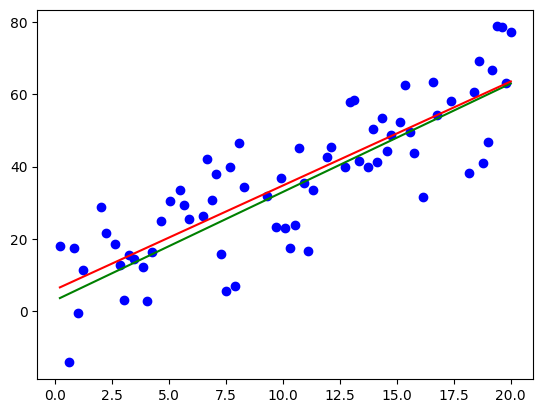

In [24]:
x = list(np.linspace(0,20,100))
for i in range(30):
    x.pop(random.randrange(len(x)))
print(x)
a=3
b=3

error = 20
rd = random.random
add_error = lambda x: x + error * (rd() * 2 - 1)
y = [i*a +add_error(b) for i in x]

plt.scatter(x, y, color='blue')
cal_y = [i*a+b for i in x]
plt.plot(x,cal_y, color='green')
x_reshaped = np.array(x).reshape(-1, 1)
model = LinearRegression().fit(x_reshaped, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
pre_y = [i*model.coef_[0] +model.intercept_ for i in x]
plt.plot(x,pre_y, color='red')

print("real rms",calculate_rms(y,cal_y))
print("calculated rms",calculate_rms(y,pre_y))

In [7]:


def compute_gradients(x, y, a, b):

    n = len(x)
    y_pred = a * x + b
    error = y - y_pred

    # Gradients
    da = -(2 / n) * np.sum(x * error)  # Partial derivative w.r.t. m
    db = -(2 / n) * np.sum(error)      # Partial derivative w.r.t. b

    return da, db


Stopping early at iteration 1408: Small gradients (da=-9.794695642995066e-07, db=1.3824735759726536e-07)


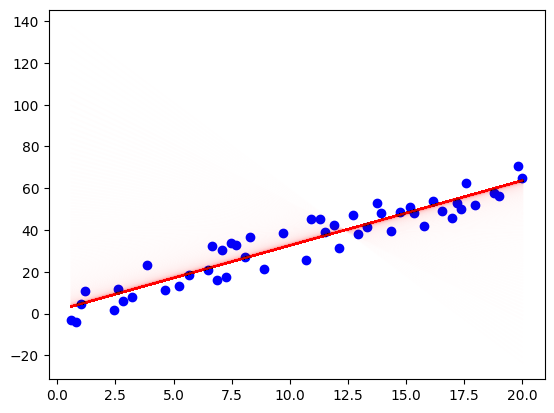

In [8]:
#using np

def create_model(x,y,rate1 = 0.5 , rate2 = 0.5, total_ir = 10000, early_stop=1e-6):
    n=len(x)
    a = (y[0]-y[1]) / (x[0]-x[1])
    b = y[0] - a*x[0]
    cal_y = (x*a)+b
    dir1=1
    dir2=1
    
    
    frate = 0.001
    da, db = compute_gradients(x, y, a, b)
    r=[]
    ra=[]
    rb=[]
    rate_l = []
    loss_a = 0  # Initialize momentum for a
    loss_b = 0
    n=100
    
    fig, ax = plt.subplots()
    ax.scatter(x,  y, color='blue')
    for i in range(total_ir):         
        da, db = compute_gradients(x, y, a, b)
        loss_a = 0.0 * loss_a + 1.0 * da
        loss_b = 0.0 * loss_b + 1.0 * db
        a = a - rate1 * loss_a
        b = b - rate2 * loss_b
        cal_y = (x*a)+b

        T = total_ir
        # Check the direction of the gradients and adjust learning rates
        if (da < 0 and dir1) or (da > 0 and not(dir1)):
            rate1 /= 1.5  # Reduce learning rate for a if gradient changes direction
            dir1 = not(dir1)  # Flip the direction flag for a
        if (db < 0 and dir2) or (db > 0 and not(dir2)):
            rate2 = 0.001 + 0.5 * (0.1 - 0.001) * (1 + np.cos(np.pi * i / T))
            dir2 = not(dir2)  # Flip the direction flag for b
        #print(rate1,rate2)

        rms = calculate_rms(y,cal_y)
        r.append(rms)
        ra.append(da)
        rb.append(db)
        rate_l.append(rate1) 
        if abs(da) < early_stop and abs(db) < early_stop:  # Stop if gradients are very small
            print(f"Stopping early at iteration {i}: Small gradients (da={da}, db={db})")
            break
        if rate1 < frate and rate2 < frate:  # Stop if learning rates are too small
            print(f"Stopping early at iteration {i}: Learning rates too small")
            break
        if rms < 2:
            ax.plot(x, cal_y, label=f'y = {a}x + {b}', color='red', alpha=(i/total_ir)**2)
    #plt.ylim(0, 10)
    plt.show()
    return float(a),float(b),r,ra,rb, rate_l

a,b,r,ra,rb,rate_l = create_model(np.array(x),np.array(y))

In [9]:
x=np.array(x)
print("final intercept and cofficiant", a,b)
cal_y = (x*a)+b
print(f"final rms: {calculate_rms(y,cal_y)}")
print(f"final loss: {ra[-1], rb[-1]}")

final intercept and cofficiant 3.1144984320210445 1.4364081388349894
final rms: 0.17657739906012998
final loss: (np.float64(-9.794695642995066e-07), np.float64(1.3824735759726536e-07))


In [10]:
def remove_outliears(r, per=90):
    r = np.array(r)
    upper_bound = np.percentile(r, per)
    lower_bound = np.percentile(r, 100-per)
    final_r= r[(r <= upper_bound) & (r >= lower_bound)]

    return final_r

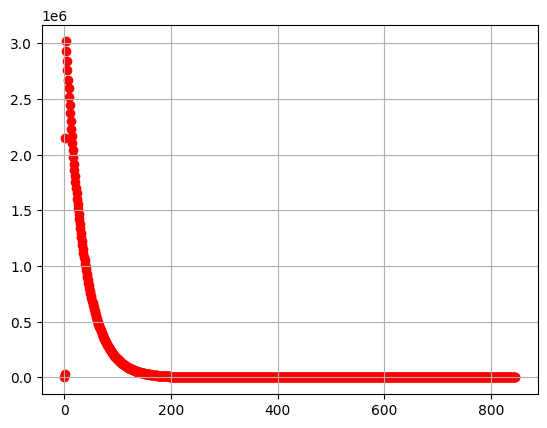

In [11]:
r = np.array(r)
final_r = remove_outliears(r,per=80)
# Scatter plot with correct indexing
plt.scatter(range(len(final_r)),final_r, color='red')
plt.grid(True)
plt.show()

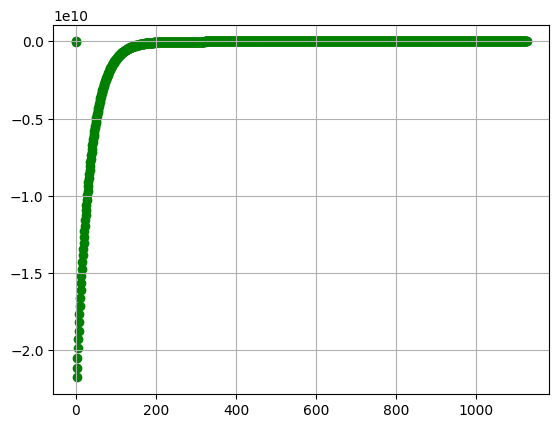

In [12]:

ra = np.array(ra)
final_ra = remove_outliears(ra)
# Scatter plot with correct indexing
plt.scatter(range(len(final_ra)),final_ra, color='green')
plt.grid(True)

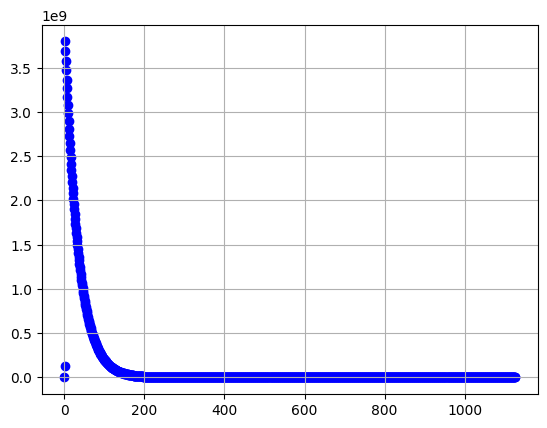

In [13]:
rb = np.array(rb)
final_rb = remove_outliears(rb)
# Scatter plot with correct indexing
plt.scatter(range(len(final_rb)),final_rb, color='blue')
plt.grid(True)
plt.show()

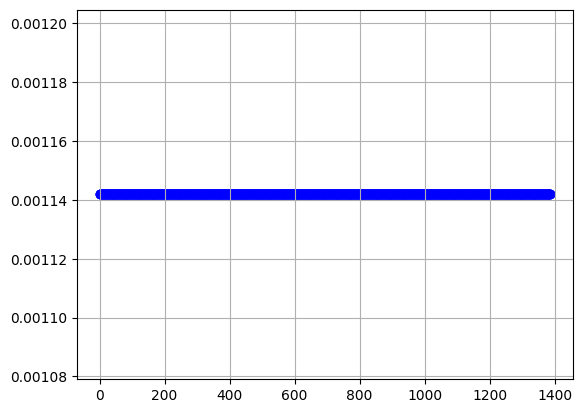

In [14]:
rl = np.array(rate_l)
final_rl = remove_outliears(rl,95)
# Scatter plot with correct indexing
plt.scatter(range(len(final_rl)),final_rl, color='blue')
plt.grid(True)
plt.show()

In [15]:
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate the slope (theta_1)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
theta_1 = numerator / denominator

# Calculate the intercept (theta_0)
theta_0 = y_mean - theta_1 * x_mean

In [16]:
print(theta_1, theta_0)

3.1144984686344377 1.4364076862470228


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def create_model(x, y, rate1=0.5, rate2=0.5, total_ir=1000, early_stop=1e-6, rate_update_fn=None):
    n=len(x)
    a = 0
    b = 0
    cal_y = (x*a)+b
    dir1=1
    dir2=1
    
    prev_rms = float('inf')
    frate = 0.001
    da, db = compute_gradients(x, y, a, b)
    r=[]
    ra=[]
    rb=[]
    rate_l = []
    loss_a = 0  # Initialize momentum for a
    loss_b = 0
    n=100
    
    fig, ax = plt.subplots()
    ax.scatter(x,  y, color='blue')
    for i in range(total_ir):         
        da, db = compute_gradients(x, y, a, b)
        
        
        T = total_ir
        if rate_update_fn:
            rate1 = max(frate, rate_update_fn(i, rate1, da))
            rate2 = max(frate, rate_update_fn(i, rate2, db))
        else:
            if (da < 0 and dir1) or (da > 0 and not dir1):
                if ra!= []:
                    da = -ra[-1]
                rate1 = max(frate, rate1 / 1.5)
                dir1 = not dir1

            if (db < 0 and dir2) or (db > 0 and not dir2):
                if rb!= []:
                    db = -rb[-1]
                rate2 = max(frate, rate2 / 1.5)
                dir2 = not dir2
        loss_a = da
        loss_b = db
        a = a - rate1 * loss_a
        b = b - rate2 * loss_b
        cal_y = (x*a)+b

        
        rms = calculate_rms(y,cal_y)
        if rms > np.mean(r[-10:-1:]) :
            if rate_update_fn:
                print(f"❌ RMS increased at iteration {i}, stopping training!")
                break
                
        r.append(rms)
        ra.append(da)
        rb.append(db)
        rate_l.append(rate1) 
        if abs(da) < early_stop and abs(db) < early_stop:  # Stop if gradients are very small
            print(f"Stopping early at iteration {i}: Small gradients (da={da}, db={db})")
            break
        if rate1 < frate and rate2 < frate:  # Stop if learning rates are too small
            print(f"Stopping early at iteration {i}: Learning rates too small")
            break
        if rms < 2:
            ax.plot(x, cal_y, label=f'y = {a}x + {b}', color='red', alpha=(i/total_ir)**2)
    #plt.ylim(0, 10)
    plt.show()
    return float(a),float(b),r,ra,rb, rate_l



C:\Users\rrpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rrpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


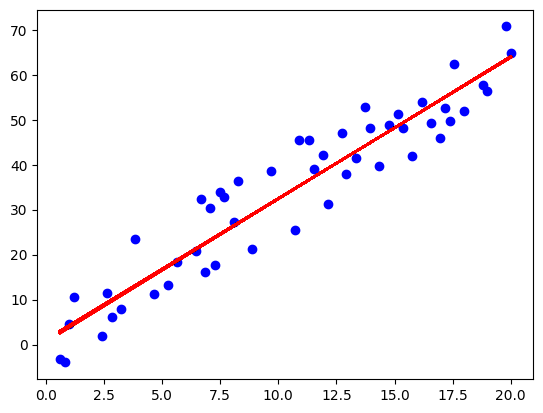

In [18]:
a, b, r, ra, rb, rate_l = create_model(
    np.array(x),
    np.array(y),
    rate1 = 0.5
)

(0.0, 200.0)

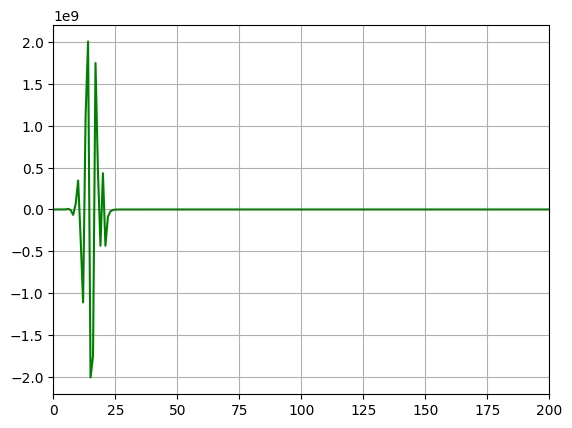

In [19]:

ra = np.array(ra)
final_ra = ra#remove_outliears(ra)
# Scatter plot with correct indexing
plt.plot(range(len(final_ra)),final_ra, color='green')
plt.grid(True)
plt.xlim(0, 200)

(-0.5, 0.5)

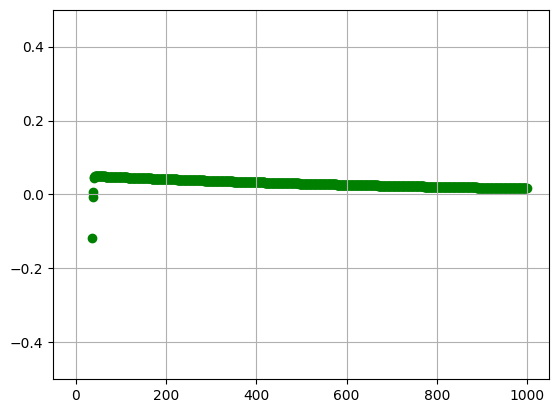

In [20]:
ra = np.array(ra)
final_ra = ra#remove_outliears(ra)
# Scatter plot with correct indexing
plt.scatter(range(len(final_ra)),final_ra, color='green')
plt.grid(True)
plt.ylim(-0.5, 0.5)

In [21]:
x=np.array(x)
print("final intercept and cofficiant", a,b)
cal_y = (x*a)+b
print(f"final rms: {calculate_rms(y,cal_y)}")
print(f"final loss: {ra[-1], rb[-1]}")

final intercept and cofficiant 3.139251050744766 1.100710638849379
final rms: 0.17663878783345813
final loss: (np.float64(0.016624904202257085), np.float64(-0.15031243283580026))



🔹 Training with Cosine Annealing2 (Initial Rate: 0.02)...


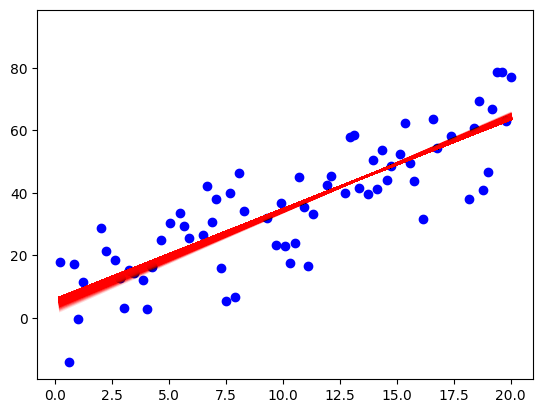


🔹 Training with Cosine Annealing0.02 (Initial Rate: 0.02)...


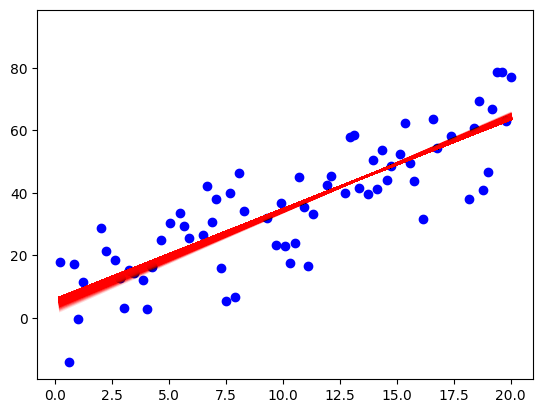


🔹 Training with Cosine Annealing0.025 (Initial Rate: 0.021)...


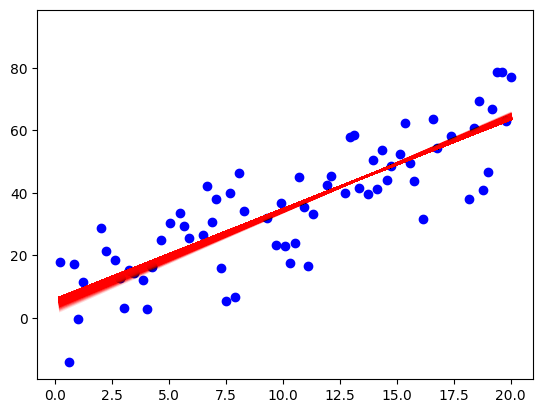


🔹 Training with Cosine Annealing0.03 (Initial Rate: 0.022)...


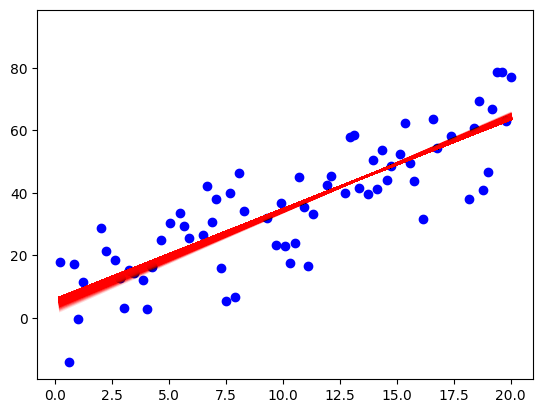


🔹 Training with Cosine Annealing0.035 (Initial Rate: 0.023)...


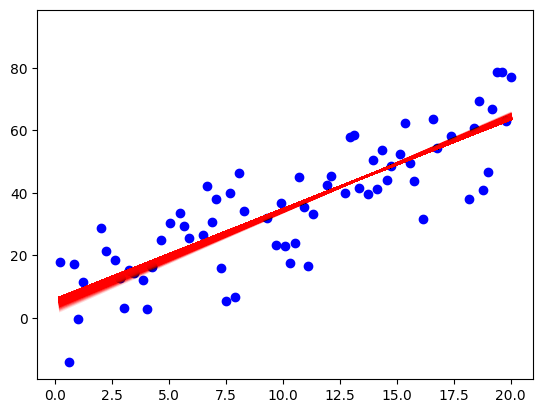


🔹 Training with Cosine Annealing0.04 (Initial Rate: 0.024)...


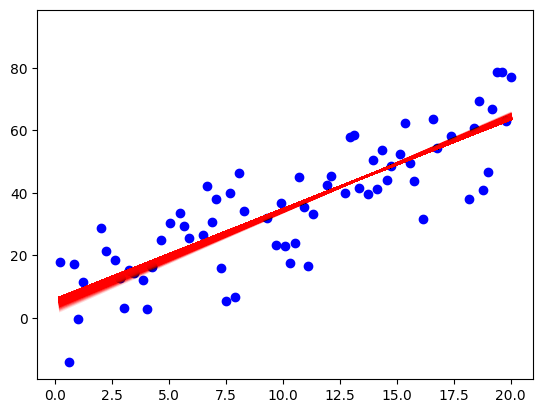


🔹 Training with Cosine Annealing0.045 (Initial Rate: 0.025)...


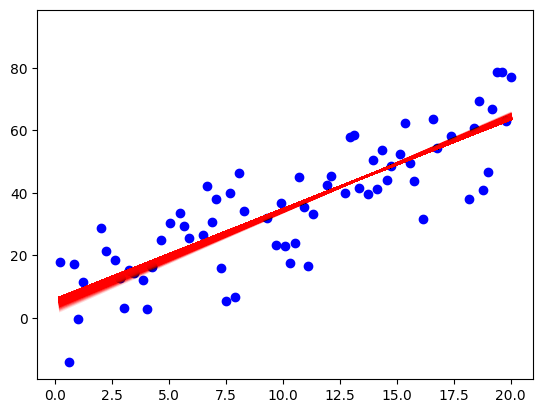


🔹 Training with Cosine Annealing0.05 (Initial Rate: 0.026000000000000002)...


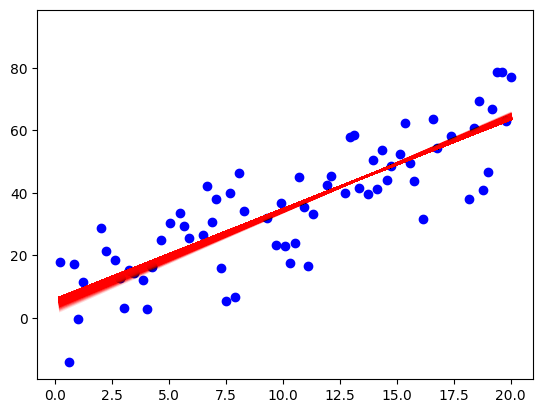


🔹 Training with Cosine Annealing0.05500000000000001 (Initial Rate: 0.027)...


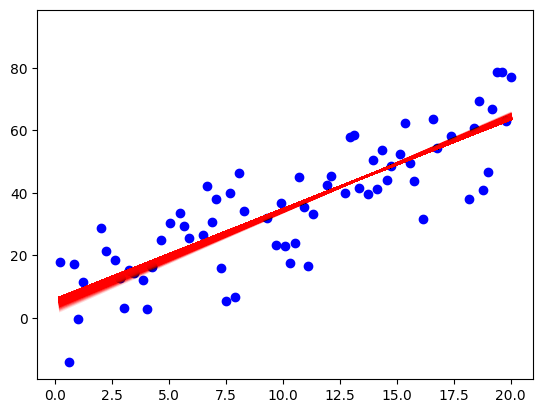


🔹 Training with Cosine Annealing0.06 (Initial Rate: 0.028)...


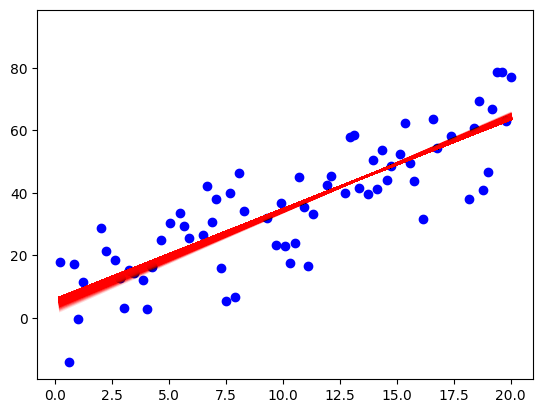


🔹 Training with Cosine Annealing0.065 (Initial Rate: 0.029)...


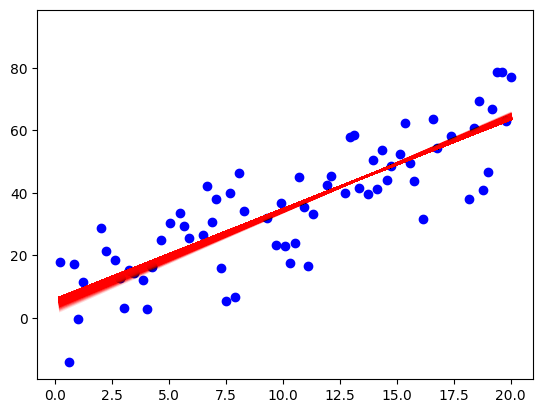

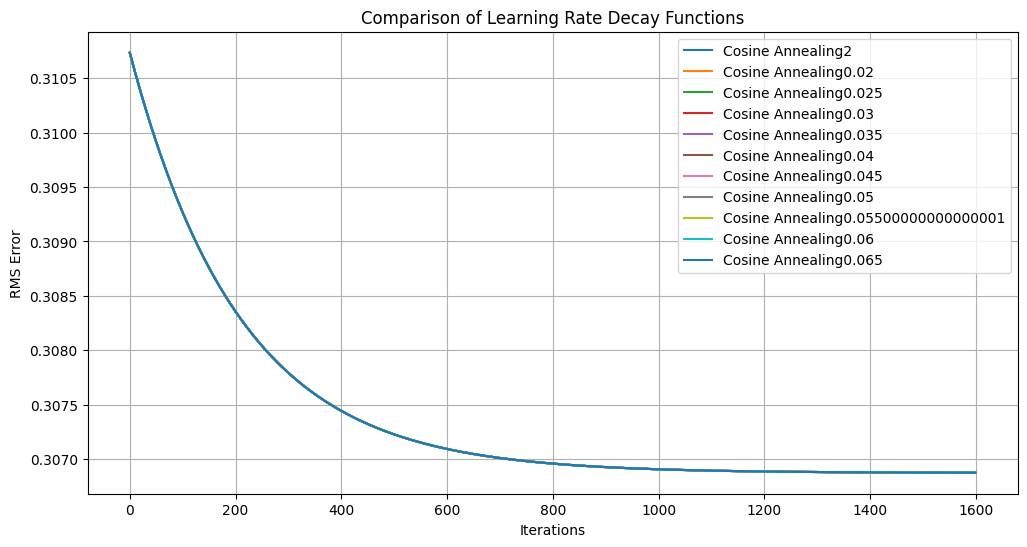

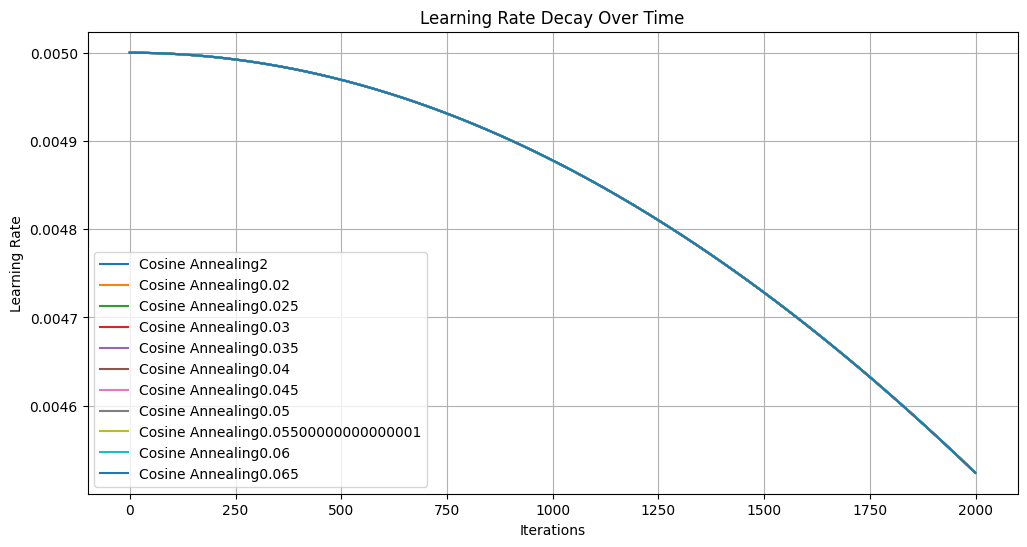

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define a few sample rate update functions for comparison
rate_functions = [
    ("Exponential Decay", lambda i, rate, grad: rate * np.exp(-0.001 * i), 0.007),  
    ("Step Decay", lambda i, rate, grad: rate * (0.5 ** (i // 10000)), 0.007),  
    ("Cosine Annealing", lambda i, rate, grad: 0.00001 + 0.5 * (0.005 - 0.00001) * (1 + np.cos(np.pi * i / 10000)), 0.01),
    ("Inverse Square Root Decay", lambda i, rate, grad: 0.001 / np.sqrt(1 + 0.05 * i), 0.01),  
    ("Direction-Based", None, 0.5)  # Default direction-based with an initial rate
]
rate_functions = [
    ("Cosine Annealing2", lambda i, rate, grad: 0.00001 + 0.5 * (0.005 - 0.00001) * (1 + np.cos(np.pi * i / 10000)), 0.02),
]
for i in range(10):
    rate_functions.append(("Cosine Annealing"+str(0.02+i*0.005), lambda i, rate, grad: 0.00001 + 0.5 * (0.005 - 0.00001) * (1 + np.cos(np.pi * i / 10000)), 0.02+i*0.001),)
# Placeholder for results
results = {}

# Iterate over all rate functions
for label, rate_fn, initial_rate in rate_functions:
    print(f"\n🔹 Training with {label} (Initial Rate: {initial_rate})...")

    a, b, r, ra, rb, rate_l = create_model(
        np.array(x), np.array(y), 
        rate1=initial_rate, rate2=initial_rate, 
        rate_update_fn=rate_fn, total_ir=2000
    )

    # Store results for comparison
    results[label] = {
        "a": a,
        "b": b,
        "rms": r,
        "rate_l": rate_l
    }

# Plot the RMS error for each rate function
plt.figure(figsize=(12, 6))
for label, result in results.items():
    result["rms"] = remove_outliears(result["rms"])
    plt.plot(result["rms"], label=label)

plt.xlabel('Iterations')
plt.ylabel('RMS Error')
plt.legend()
plt.title('Comparison of Learning Rate Decay Functions')
plt.grid(True)
plt.show()

# Optionally plot the learning rates for each function
plt.figure(figsize=(12, 6))
for label, result in results.items():
    plt.plot(result["rate_l"], label=label)

plt.xlabel('Iterations')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Learning Rate Decay Over Time')
plt.grid(True)
plt.show()
